In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
df = pd.read_csv("creditcard.csv")
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [4]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [5]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#Thresholds
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

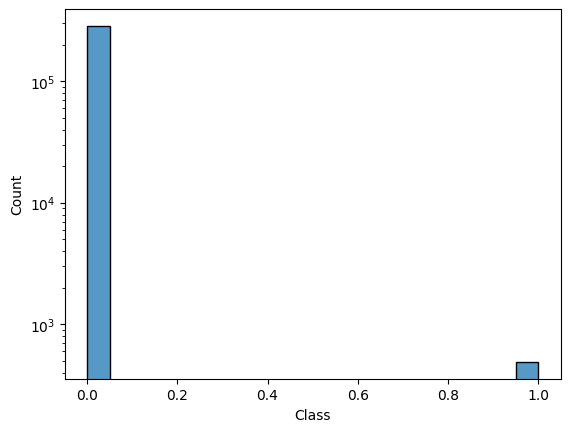

In [10]:
sns.histplot(df['Class'])
plt.yscale('log')
plt.show()

In [11]:
df.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

In [12]:
x_dummy=df.drop(columns='Class', axis=1)
y=df['Class']

In [13]:
scaler=StandardScaler()
x=scaler.fit_transform(x_dummy)

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=123)
print(f'x_train{x_train.shape}\n, x_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(227845, 30)
, x_test(56962, 30)
, y_train(227845,)
, y_test(56962,)


In [15]:
def logic_regression(x_train, y_train, x_test):
  lr=LogisticRegression()
  lr.fit(x_train, y_train)
  y_train_pred=lr.predict(x_train)
  y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*100)
  print("TRAIN MODEL CLASSIFICATION REPORT")
  print("_"*100)
  print(y_train_cl_report)
  y_test_pred=lr.predict(x_test)
  y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*100)
  print("TEST MODEL CLASSIFICATION REPORT")
  print("_"*100)
  print(y_test_cl_report)
  print("_"*100)
  return y_test_pred, lr


In [16]:
y_test_pred, lr= logic_regression(x_train, y_train, x_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.89      0.62      0.73       377

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.83      0.58      0.68       115

    accuracy                          

In [17]:
def conf_mat(y_test, y_test_pred):
  con_mat=confusion_matrix(y_test, y_test_pred)
  labels = ['No Fraud', 'Fraud']
  sns.heatmap(con_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

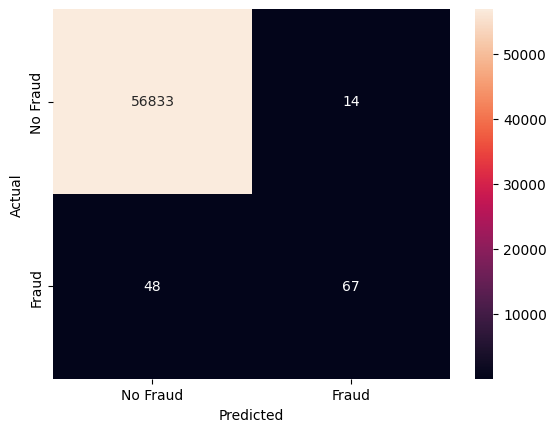

In [18]:
conf_mat(y_test, y_test_pred)

In [19]:
df_0 = df[df['Class'] == 0].sample(n=492, random_state=42)
df_1= df[df['Class'] == 1].sample(n=492, random_state=42)
print(f' Fraud Shape{df_1.shape}\n No Fraud shape{df_0.shape}')

 Fraud Shape(492, 31)
 No Fraud shape(492, 31)


In [20]:
df_concat=pd.concat([df_0,df_1], ignore_index=True)
df_concat.shape

(984, 31)

In [21]:
x_bal_dummy=df_concat.drop('Class', axis=1)
y_bal=df_concat['Class']
print(x_bal_dummy.shape, '\n', y_bal.shape)

(984, 30) 
 (984,)


In [22]:
x_bal=scaler.fit_transform(x_bal_dummy)

In [23]:
x_train_b, x_test_b, y_train_b, y_test_b=train_test_split(x_bal,y_bal, test_size=0.20, random_state=123)
print(f'x_train{x_train_b.shape}\n, x_test{x_test_b.shape}\n, y_train{y_train_b.shape}\n, y_test{y_test_b.shape}')

x_train(787, 30)
, x_test(197, 30)
, y_train(787,)
, y_test(197,)


In [24]:
bal_lr=LogisticRegression()
bal_lr.fit(x_train_b,y_train_b)
bal_pred_train=bal_lr.predict(x_train_b)
bal_pred_test=bal_lr.predict(x_test_b)

In [25]:
bal_cl_report_train=classification_report(y_train_b,bal_pred_train)
print(bal_cl_report_train)
bal_cl_report_test=classification_report(y_test_b,bal_pred_test)
print(bal_cl_report_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.98      0.92      0.95       404

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



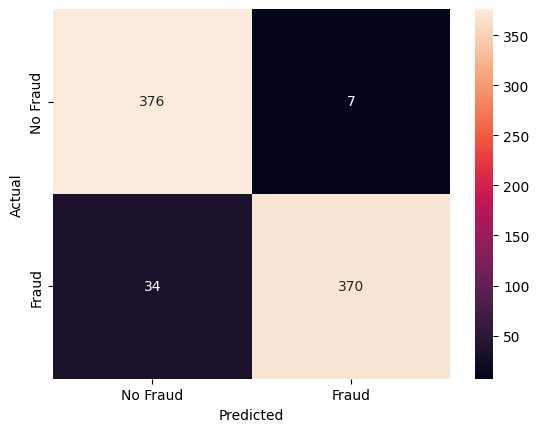

In [26]:
conf_mat(y_train_b,bal_pred_train)